In [4]:
# importing the dependecies
import os 
import cv2 as cv
import matplotlib.pyplot as plt
directory='/media/suman/649EF25A9EF223E8/Machine Learning/Deep learning Algorithms/Datasets/rockpaper'
categories=['rock','paper','scissors']

In [5]:
#creating the training data
training_data=[]
def createtrainingdata():
    for category in categories:
        path=os.path.join(directory,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv.imread(os.path.join(path,img))
                new_array=cv.resize(img_array,(100,100))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
createtrainingdata()

In [6]:
for category in categories:
    print(categories.index(category))

0
1
2


In [7]:
print(len(training_data))

2188


In [8]:
# shuffling the data
import random
random.shuffle(training_data)
for sample in training_data[:2]:
    print(sample[0])

[[[ 40 127  48]
  [ 38 126  47]
  [ 39 127  47]
  ...
  [ 46 130  90]
  [ 47 130  92]
  [ 46 129  93]]

 [[ 41 127  47]
  [ 40 127  47]
  [ 41 130  50]
  ...
  [ 39 145  60]
  [ 39 143  63]
  [ 39 143  64]]

 [[ 40 128  47]
  [ 41 129  46]
  [ 41 130  48]
  ...
  [ 39 146  62]
  [ 39 144  63]
  [ 39 144  62]]

 ...

 [[ 28 116  31]
  [ 27 117  32]
  [ 26 117  30]
  ...
  [ 20 113  39]
  [ 18 111  37]
  [ 19 112  38]]

 [[ 30 118  36]
  [ 29 116  35]
  [ 29 117  34]
  ...
  [ 20 112  40]
  [ 20 110  40]
  [ 20 111  41]]

 [[ 31 118  38]
  [ 32 117  39]
  [ 28 114  35]
  ...
  [ 19 112  41]
  [ 23 111  45]
  [ 23 111  45]]]
[[[ 59 142  47]
  [ 52 138  42]
  [ 57 141  45]
  ...
  [ 53 131  78]
  [ 53 132  77]
  [ 52 129  75]]

 [[ 57 140  45]
  [ 56 141  46]
  [ 60 144  49]
  ...
  [ 51 144  50]
  [ 52 143  51]
  [ 52 143  51]]

 [[ 57 141  45]
  [ 57 142  46]
  [ 59 143  47]
  ...
  [ 51 146  54]
  [ 54 145  55]
  [ 52 143  53]]

 ...

 [[ 52 146  42]
  [ 56 148  44]
  [ 53 147  43]
  ..

In [9]:
# appeding the labels and features to the x and y
x=[]
y=[]
for features,labels in training_data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
x.shape

(2188, 100, 100, 3)

In [11]:
y.shape

(2188,)

In [12]:
y.ndim

1

In [13]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
# making the neural network
from tensorflow.keras import layers,models
import tensorflow as tf
x=np.array(x)
y=np.array(y)
x=x/255
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# compiling the neural network
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

<IPython.core.display.Javascript object>

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 32)       

In [33]:
# fitting the data to the neural network
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
55/55 [==============================] - 4s 71ms/step - loss: 0.4398 - accuracy: 0.7760 - val_loss: 0.3047 - val_accuracy: 0.9087
Epoch 2/30
55/55 [==============================] - 4s 66ms/step - loss: 0.3925 - accuracy: 0.8509 - val_loss: 0.2784 - val_accuracy: 0.9064
Epoch 3/30
55/55 [==============================] - 4s 68ms/step - loss: 0.3588 - accuracy: 0.8594 - val_loss: 0.2950 - val_accuracy: 0.8950
Epoch 4/30
55/55 [==============================] - 4s 75ms/step - loss: 0.3058 - accuracy: 0.8891 - val_loss: 0.3411 - val_accuracy: 0.8836
Epoch 5/30
55/55 [==============================] - 5s 88ms/step - loss: 0.3094 - accuracy: 0.8869 - val_loss: 0.2284 - val_accuracy: 0.9224
Epoch 6/30
55/55 [==============================] - 5s 91ms/step - loss: 0.2870 - accuracy: 0.8994 - val_loss: 0.2286 - val_accuracy: 0.9292
Epoch 7/30
55/55 [==============================] - 5s 86ms/step - loss: 0.2850 - accuracy: 0.9057 - val_loss: 0.2534 - val_accuracy: 0.9475
Epoch 8/30
55

In [44]:
fig,axes=plt.subplot(1,2)

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

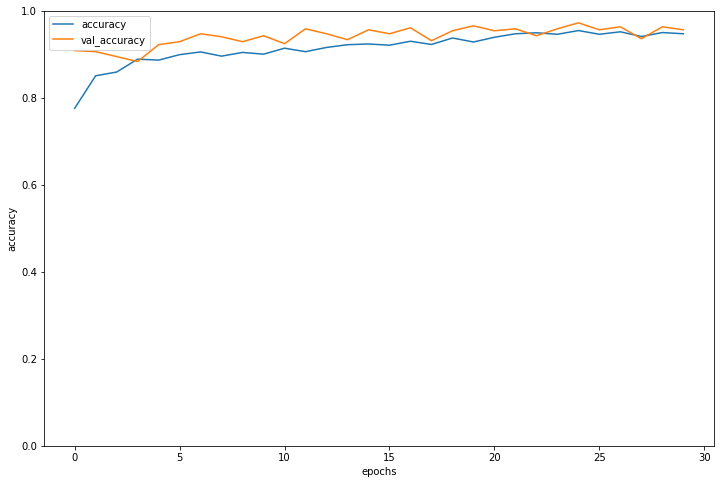

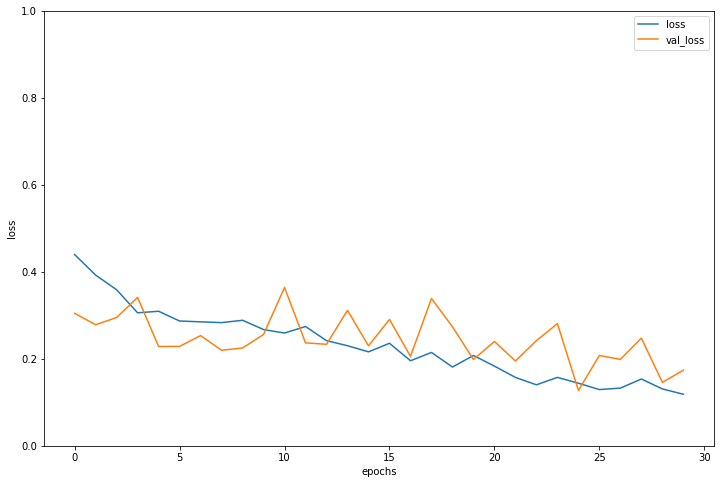

In [47]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylim(0,1)
plt.ylabel('loss')
plt.legend()